In [ ]:
from requests import Request, Session


In [ ]:
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


In [ ]:
type(data)

dict

In [ ]:
import pandas as pd
#to dislay maximum columns
pd.set_option('display.max_columns',None)
#to make the data pretty
df = pd.json_normalize(data['data'])
#to store the time script is run in a column
df['timestamp'] = pd.to_datetime('now')
df

<ipython-input-6-4b1d68960cf2>:7: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10816,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.962488e+07,1.962488e+07,False,NaN,1,NaN,NaN,None,2024-02-11T15:05:00.000Z,48214.429660,1.972051e+10,-18.6885,0.216134,1.925195,12.495528,6.278537,15.463439,31.047370,9.462024e+11,52.2792,1.012503e+12,None,2024-02-11T15:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-11 15:05:44.669657
1,1027,Ethereum,ETH,ethereum,8394,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201706e+08,1.201706e+08,True,NaN,2,NaN,NaN,None,2024-02-11T15:05:00.000Z,2513.413408,7.360287e+09,-16.6094,-0.028600,0.782156,9.368947,-6.733638,13.912680,20.057785,3.020383e+11,16.6892,3.020383e+11,None,2024-02-11T15:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-11 15:05:44.669657
2,825,Tether USDt,USDT,tether,74504,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,9.634176e+10,9.960063e+10,True,NaN,3,NaN,NaN,None,2024-02-11T15:04:00.000Z,1.000378,3.179113e+10,-17.7531,-0.013547,0.006588,0.047410,0.025547,0.084084,0.003759,9.637815e+10,5.3254,9.963825e+10,None,2024-02-11T15:04:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-02-11 15:05:44.669657
3,1839,BNB,BNB,bnb,2060,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495454e+08,1.495454e+08,False,NaN,4,NaN,NaN,None,2024-02-11T15:04:00.000Z,320.776361,7.114034e+08,-13.5823,-0.250388,-0.186396,5.109641,3.498436,28.166501,29.887579,4.797062e+10,2.6505,4.797062e+10,None,2024-02-11T15:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-11 15:05:44.669657
4,5426,Solana,SOL,solana,625,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.371889e+08,5.692074e+08,True,NaN,5,NaN,NaN,None,2024-02-11T15:05:00.000Z,109.397165,1.457201e+09,-39.3703,0.168024,0.940697,12.331612,11.482078,62.148267,93.226242,4.782722e+10,2.6425,6.226967e+10,None,2024-02-11T15:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-11 15:05:44.669657
5,52,XRP,XRP,xrp,1227,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.450697e+10,9.998791e+10,False,NaN,6,NaN,NaN,None,2024-02-11T15:05:00.000Z,0.530630,7.350872e+08,5.1268,0.183027,1.775856,3.736198,-11.269347,-13.255933,-18.541377,2.892305e+10,1.5980,5.306303e+10,None,2024-02-11T15:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-11 15:05:44.669657
6,3408,USDC,USDC,usd-coin,16651,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.795408e+10,2.795408e+10,False,NaN,7,NaN,NaN,None,2024-02-11T15:05:00.000Z,0.999993,4.138607e+09,-24.8631,-0.001050,-0.001650,-0.041801,-0.005249,-0.038999,-0.019347,2.795390e+10,1.5445,2.795390e+10,None,2024-02-11T15:05:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-02-11 15:05:44.669657
7,2010,Cardano,ADA,cardano,1068,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.544199e+10,3.661393e+10,False,NaN,8,NaN,NaN,None,2024-02-11T15:04:00.000Z,0.546765,5.401872e+08,32.2288,-0.328170,2.369424,8.131000,-6.277794,-11.711200,47.964887,1.937843e+10,1.0707,2.460441e+10,None,2024-02-11T15:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-11 15:05:44.669657
8,5805,Avalanche,AVAX,avalanche,661,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p..."

In [ ]:
#to average the changes of coins that we are taking every minute
df2= df.groupby('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df2

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.216134,1.925195,12.495528,6.278537,15.463439,31.047370
Ethereum,-0.028600,0.782156,9.368947,-6.733638,13.912680,20.057785
Tether USDt,-0.013547,0.006588,0.047410,0.025547,0.084084,0.003759
BNB,-0.250388,-0.186396,5.109641,3.498436,28.166501,29.887579
Solana,0.168024,0.940697,12.331612,11.482078,62.148267,93.226242
XRP,0.183027,1.775856,3.736198,-11.269347,-13.255933,-18.541377
USDC,-0.001050,-0.001650,-0.041801,-0.005249,-0.038999,-0.019347
Cardano,-0.328170,2.369424,8.131000,-6.277794,-11.711200,47.964887
Avalanche,0.147228,2.775480,12.299009,3.944276,2.724211,127.107506


In [ ]:
#to change column to rows, use stack on dataframe
df3 = df2.stack()
df3

name                                 
Bitcoin  quote.USD.percent_change_1h      0.216134
         quote.USD.percent_change_24h     1.925195
         quote.USD.percent_change_7d     12.495528
         quote.USD.percent_change_30d     6.278537
         quote.USD.percent_change_60d    15.463439
                                           ...    
Toncoin  quote.USD.percent_change_24h     1.809832
         quote.USD.percent_change_7d      3.072427
         quote.USD.percent_change_30d    -1.759831
         quote.USD.percent_change_60d     0.023262
         quote.USD.percent_change_90d   -12.953842
Length: 90, dtype: float64

In [ ]:
#series and not a dataframe
type(df3)

pandas.core.series.Series

In [ ]:
df4 = df3.to_frame(name='values')
#df4 = pd.set_option('display.max_rows',None)
df4

values
name                                                
Bitcoin     quote.USD.percent_change_1h     0.216134
            quote.USD.percent_change_24h    1.925195
            quote.USD.percent_change_7d    12.495528
            quote.USD.percent_change_30d    6.278537
            quote.USD.percent_change_60d   15.463439
            quote.USD.percent_change_90d   31.047370
Ethereum    quote.USD.percent_change_1h    -0.028600
            quote.USD.percent_change_24h    0.782156
            quote.USD.percent_change_7d     9.368947
            quote.USD.percent_change_30d   -6.733638
            quote.USD.percent_change_60d   13.912680
            quote.USD.percent_change_90d   20.057785
Tether USDt quote.USD.percent_change_1h    -0.013547
            quote.USD.percent_change_24h    0.006588
            quote.USD.percent_change_7d     0.047410
            quote.USD.percent_change_30d    0.025547
            quote.USD.percent_change_60d    0.084084
            quote.USD.percent_change_90d    0.003759
BNB         quote.USD.percent_change_1h    -0.250388
            quote.USD.percent_change_24h   -0.186396
            quote.USD.percent_change_7d     5.109641
            quote.USD.percent_change_30d    3.498436
            quote.USD.percent_change_60d   28.166501
            quote.USD.percent_change_90d   29.887579
Solana      quote.USD.percent_change_1h     0.168024
            quote.USD.percent_change_24h    0.940697
            quote.USD.percent_change_7d    12.331612
            quote.USD.percent_change_30d   11.482078
            quote.USD.percent_change_60d   62.148267
            quote.USD.percent_change_90d   93.226242
XRP         quote.USD.percent_change_1h     0.183027
            quote.USD.percent_change_24h    1.775856
            quote.USD.percent_change_7d     3.736198
            quote.USD.percent_change_30d  -11.269347
            quote.USD.percent_change_60d  -13.255933
            quote.USD.percent_change_90d  -18.541377
USDC        quote.USD.percent_change_1h    -0.001050
            quote.USD.percent_change_24h   -0.001650
            quote.USD.percent_change_7d    -0.041801
            quote.USD.percent_change_30d   -0.005249
            quote.USD.percent_change_60d   -0.038999
            quote.USD.percent_change_90d   -0.019347
Cardano     quote.USD.percent_change_1h    -0.328170
            quote.USD.percent_change_24h    2.369424
            quote.USD.percent_change_7d     8.131000
            quote.USD.percent_change_30d   -6.277794
            quote.USD.percent_change_60d  -11.711200
            quote.USD.percent_change_90d   47.964887
Avalanche   quote.USD.percent_change_1h     0.147228
            quote.USD.percent_change_24h    2.775480
            quote.USD.percent_change_7d    12.299009
            quote.USD.percent_change_30d    3.944276
            quote.USD.percent_change_60d    2.724211
            quote.USD.percent_change_90d  127.107506
Chainlink   quote.USD.percent_change_1h    -0.425302
            quote.USD.percent_change_24h    9.666932
            quote.USD.percent_change_7d    10.892612
            quote.USD.percent_change_30d   32.309206
            quote.USD.percent_change_60d   39.384177
            quote.USD.percent_change_90d   33.123241
Dogecoin    quote.USD.percent_change_1h     0.049138
            quote.USD.percent_change_24h    1.167549
            quote.USD.percent_change_7d     3.997522
            quote.USD.percent_change_30d   -3.500009
            quote.USD.percent_change_60d  -11.410466
            quote.USD.percent_change_90d    6.196430
TRON        quote.USD.percent_change_1h    -0.127382
            quote.USD.percent_change_24h    0.842159
            quote.USD.percent_change_7d     5.075001
            quote.USD.percent_change_30d   15.583105
            quote.USD.percent_change_60d   20.495389
            quote.USD.percent_change_90d   13.528436
Polkadot    quote.USD.percent_change_1h    -0.072910
            quote.USD.percent_change_24h    1.078509
            quote.

In [ ]:
#to put index in numeric form,total rows = 90
index = pd.Index(range(90))
df5 = df4.set_index(index)
df5

,values
0,0.216134
1,1.925195
2,12.495528
3,6.278537
4,15.463439
5,31.047370
6,-0.028600
7,0.782156
8,9.368947
9,-6.733638


In [ ]:
#to have name of the coin in row as well, reset function automtically sets the indexes
df5 = df4.reset_index()
df5

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.216134
1,Bitcoin,quote.USD.percent_change_24h,1.925195
2,Bitcoin,quote.USD.percent_change_7d,12.495528
3,Bitcoin,quote.USD.percent_change_30d,6.278537
4,Bitcoin,quote.USD.percent_change_60d,15.463439
5,Bitcoin,quote.USD.percent_change_90d,31.047370
6,Ethereum,quote.USD.percent_change_1h,-0.028600
7,Ethereum,quote.USD.percent_change_24h,0.782156
8,Ethereum,quote.USD.percent_change_7d,9.368947
9,Ethereum,quote.USD.percent_change_30d,-6.733638


In [ ]:
#to change the name of level_1 column
df6 = df5.rename(columns={'level_1':'percent_change'})
df6

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.216134
1,Bitcoin,quote.USD.percent_change_24h,1.925195
2,Bitcoin,quote.USD.percent_change_7d,12.495528
3,Bitcoin,quote.USD.percent_change_30d,6.278537
4,Bitcoin,quote.USD.percent_change_60d,15.463439
5,Bitcoin,quote.USD.percent_change_90d,31.047370
6,Ethereum,quote.USD.percent_change_1h,-0.028600
7,Ethereum,quote.USD.percent_change_24h,0.782156
8,Ethereum,quote.USD.percent_change_7d,9.368947
9,Ethereum,quote.USD.percent_change_30d,-6.733638


In [ ]:
#changing long columns to shorter ones
df6['percent_change'] = df6['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d',
'quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df6

,name,percent_change,values
0,Bitcoin,1h,0.216134
1,Bitcoin,24h,1.925195
2,Bitcoin,7d,12.495528
3,Bitcoin,30d,6.278537
4,Bitcoin,60d,15.463439
5,Bitcoin,90d,31.047370
6,Ethereum,1h,-0.028600
7,Ethereum,24h,0.782156
8,Ethereum,7d,9.368947
9,Ethereum,30d,-6.733638


In [ ]:
#to visualize the data
import seaborn as sn
import matplotlib as plt

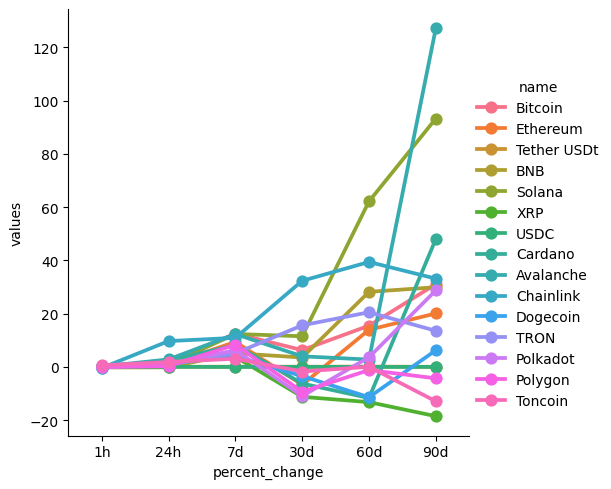

In [ ]:
sn.catplot(x ='percent_change', y = 'values', hue ='name', data = df6, kind = 'point')